In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('../src/data/user_aggregates.csv')


Step 1: Data Description and Data Types

In [5]:
df.head()

,MSISDN/Number,Number of xDR Sessions,Total Session Duration (ms),Total Download (Bytes),Total Upload (Bytes),Total Data Volume (Bytes),YouTube Download (Bytes),YouTube Upload (Bytes),Netflix Download (Bytes),Netflix Upload (Bytes),Gaming Download (Bytes),Gaming Upload (Bytes),Other Download (Bytes),Other Upload (Bytes)
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


In [7]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                106856 non-null  float64
 1   Number of xDR Sessions       106856 non-null  int64  
 2   Total Session Duration (ms)  106856 non-null  float64
 3   Total Download (Bytes)       106856 non-null  float64
 4   Total Upload (Bytes)         106856 non-null  float64
 5   Total Data Volume (Bytes)    106856 non-null  float64
 6   YouTube Download (Bytes)     106856 non-null  float64
 7   YouTube Upload (Bytes)       106856 non-null  float64
 8   Netflix Download (Bytes)     106856 non-null  float64
 9   Netflix Upload (Bytes)       106856 non-null  float64
 10  Gaming Download (Bytes)      106856 non-null  float64
 11  Gaming Upload (Bytes)        106856 non-null  float64
 12  Other Download (Bytes)       106856 non-null  float64
 13 

In [8]:
print(df.describe())

       MSISDN/Number  Number of xDR Sessions  Total Session Duration (ms)  \
count   1.068560e+05           106856.000000                 1.068560e+05   
mean    4.511474e+10                1.389777                 1.461672e+05   
std     2.889423e+12                0.809863                 1.863587e+05   
min     3.360100e+10                0.000000                 7.142000e+03   
25%     3.365088e+10                1.000000                 7.130800e+04   
50%     3.366365e+10                1.000000                 1.027400e+05   
75%     3.368344e+10                2.000000                 1.727990e+05   
max     8.823971e+14               18.000000                 1.855375e+07   

       Total Download (Bytes)  Total Upload (Bytes)  \
count            1.068560e+05          1.068560e+05   
mean             6.336527e+08          5.730942e+07   
std              4.645551e+08          3.565765e+07   
min              8.827082e+06          2.866892e+06   
25%              3.148271e+08  

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values:\n", df[col].unique())

Step 2: Handle Missing Values and Outliers

In [12]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)


MSISDN/Number                  0
Number of xDR Sessions         0
Total Session Duration (ms)    0
Total Download (Bytes)         0
Total Upload (Bytes)           0
Total Data Volume (Bytes)      0
YouTube Download (Bytes)       0
YouTube Upload (Bytes)         0
Netflix Download (Bytes)       0
Netflix Upload (Bytes)         0
Gaming Download (Bytes)        0
Gaming Upload (Bytes)          0
Other Download (Bytes)         0
Other Upload (Bytes)           0
dtype: int64


Step 3: Creating and Describing Variables


In [13]:
# Create Total Data column (Total Download + Total Upload)
df['Total_Data'] = df['Total Download (Bytes)'] + df['Total Upload (Bytes)']

# Total Session Duration already exists as "Total Session Duration (ms)"
# Describe key variables
print(df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].describe())


       Number of xDR Sessions  Total Session Duration (ms)    Total_Data
count           106856.000000                106856.000000  1.068560e+05
mean                 1.291390                116775.594461  6.210808e+08
std                  0.537724                 68222.704749  3.365916e+08
min                  0.000000                  7142.000000  3.324901e+07
25%                  1.000000                 71308.000000  3.582423e+08
50%                  1.000000                102740.000000  6.169743e+08
75%                  1.389777                155542.000000  8.146677e+08
max                  3.000000                324991.000000  1.649611e+09


Step 4: Segmenting Users into Decile Classes

In [14]:
# Create deciles based on Total Session Duration
df['Decile'] = pd.qcut(df['Total Session Duration (ms)'], 10, labels=range(1, 11))

# Compute total data volume for each decile
decile_data = df.groupby('Decile')['Total_Data'].sum().reset_index()
print(decile_data)


  Decile    Total_Data
0      1  5.432887e+12
1      2  6.046481e+12
2      3  6.445154e+12
3      4  6.031769e+12
4      5  5.089029e+12
5      6  6.311735e+12
6      7  9.623668e+12
7      8  4.849035e+12
8      9  8.000972e+12
9     10  8.535478e+12


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_3588\1304454119.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = df.groupby('Decile')['Total_Data'].sum().reset_index()


Step 5: Analyzing Basic Metrics

In [15]:
# Calculate basic metrics
metrics = df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].agg(['mean', 'median', 'std', 'var'])
print(metrics)


        Number of xDR Sessions  Total Session Duration (ms)    Total_Data
mean                  1.291390                 1.167756e+05  6.210808e+08
median                1.000000                 1.027400e+05  6.169743e+08
std                   0.537724                 6.822270e+04  3.365916e+08
var                   0.289147                 4.654337e+09  1.132939e+17


Step 6: Non-Graphical Univariate Analysis


In [16]:
# Compute range for each quantitative variable
quantitative_vars = ['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']
for col in quantitative_vars:
    col_range = df[col].max() - df[col].min()
    print(f"Range for {col}: {col_range}")


Range for Number of xDR Sessions: 3.0
Range for Total Session Duration (ms): 317849.0
Range for Total_Data: 1616362480.0


Step 7: Graphical Univariate Analysis


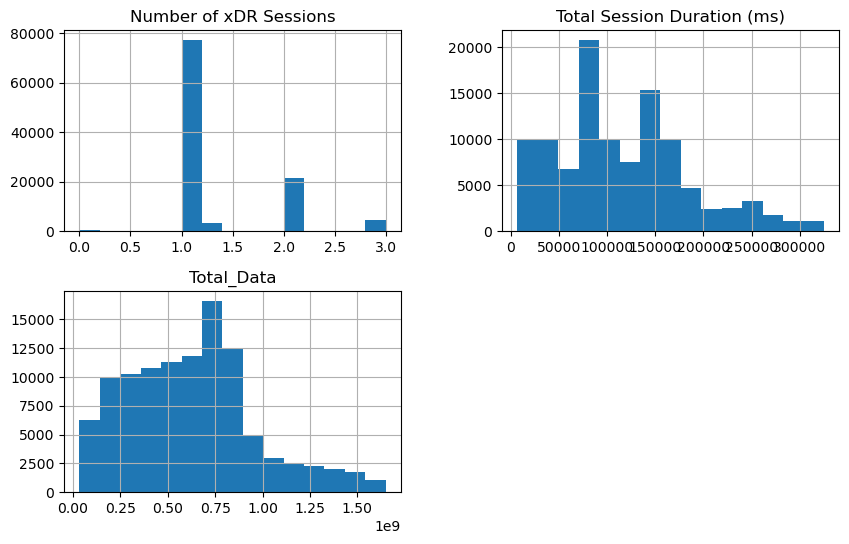

In [17]:
import matplotlib.pyplot as plt

# Plot histograms for key variables
df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].hist(bins=15, figsize=(10, 6))
plt.show()
